#### Creating features from the preprocessed data
- First converting reviews.rating into 3 parts: positive, negative and neutral
- if rating >= 4 then Positive, = 3 then neutal else negative

In [1]:
import os
os.chdir("..")
%pwd

'c:\\Users\\Lenovo\\MLOPS\\HealthKart-recommendation-system'

In [2]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('data/preprocessed_data/preprocessed_reviews.csv')
df.head()

,reviews.rating,transformed_text
0,5,love album good hip hop side current pop sound...
1,5,good flavor review collect part promot
2,5,good flavor
3,1,read review look buy one coupl lubric ultim di...
4,1,husband bought gel us gel caus irrit felt like...


In [14]:
df['reviews.rating'].isnull().sum()

np.int64(0)

In [15]:
def map_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

In [16]:
df['Review'] = df['reviews.rating'].apply(map_sentiment)
df.head()

,reviews.rating,transformed_text,Review
0,5,love album good hip hop side current pop sound...,positive
1,5,good flavor review collect part promot,positive
2,5,good flavor,positive
3,1,read review look buy one coupl lubric ultim di...,negative
4,1,husband bought gel us gel caus irrit felt like...,negative


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Review_encoded'] = le.fit_transform(df['Review'])
df.head()

,reviews.rating,transformed_text,Review,Review_encoded
0,5,love album good hip hop side current pop sound...,positive,2
1,5,good flavor review collect part promot,positive,2
2,5,good flavor,positive,2
3,1,read review look buy one coupl lubric ultim di...,negative,0
4,1,husband bought gel us gel caus irrit felt like...,negative,0


In [18]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

- 0 = negative, 1 = neutral , 2 = positive

In [19]:
df['Review_encoded'].value_counts()

Review_encoded
2    56272
0     4621
1     4056
Name: count, dtype: int64

<Axes: xlabel='Review_encoded'>

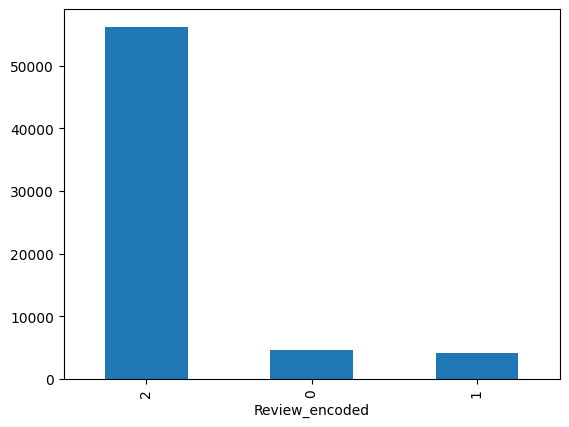

In [23]:
data = df['Review_encoded'].value_counts()
data.plot(kind = 'bar')

- Highly imbalance
- Two way to solve 
- 1. Converting these multi category(3) into binary
- 2. Resampling 

- But Recommendation system needs aggregate scores, not classifications
- so i am going to use that data only

In [20]:
df = df.drop(columns = ['reviews.rating', 'Review'], axis=1)

In [21]:
## save featured data
output_dir = "data/featured_data"
output_file = os.path.join(output_dir, "featured_reviews.csv")
os.makedirs(output_dir, exist_ok=True)
df.to_csv(output_file, index=False)
print(f"Featured data saved to {output_file}")

Featured data saved to data/featured_data\featured_reviews.csv
